In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [63]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#plt.style.use('seaborn')

#importing data
data1=pd.read_csv("../input/Data File.csv",encoding='latin-1',low_memory=False)
data1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [64]:
data1.shape
data1.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969,855969.000000,855969.000000,855969,855969,806526,812908,855969,8.559690e+05,855969,855969,855969,121812,855969,855936,855969,855969,855969.000000,855969.000000,855969,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,847107,855969.000000,602998,855919,855913.000000,213139.000000,855969.0,855969,442.000000,440.000000,442,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,290910,11,6,NaN,3,103,2,120335,14,60954,931,51,NaN,NaN,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,3,102,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Source Verified,Oct-15,n,,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Aug-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-16,NaN,Feb-16,Jan-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,Not Verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,600221,NaN,NaN,247998,54958,12965,282090,429106,NaN,318178,48212,855964,231,505392,398089,9466,125172,NaN,NaN,6433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467510,NaN,534094,701687,NaN,NaN,NaN,855527,NaN,NaN,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,NaN,13.192320,436.238072,NaN,NaN,NaN,NaN,NaN,7.507119e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.122165,0.311621,NaN,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,NaN,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,NaN,2225.985295,NaN,NaN,0.014230,44.101450,1.0,NaN,107412.163982,18.318477,NaN,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,NaN,4.368365,243.726876,NaN,NaN,NaN,NaN,NaN,6.426447e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.423629,0.857189,NaN,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,NaN,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,NaN,4864.966593,NaN,NaN,0.133712,22.164907,0.0,NaN,47987.608637,7.221855,NaN,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.59

In [65]:
print(data1.isnull().sum()/data1.shape[0]*100,"%")

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.776261
emp_length                      5.030673
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_d                         0.000000
pymnt_plan                      0.000000
desc                           85.769111
purpose                         0.000000
title                           0.003855
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_cr_line

In [66]:
data2 = data1.loc[:, data1.isnull().sum() < 0.8*data1.shape[0]]

In [ ]:
data1.shape
data2.shape

In [ ]:
data2.describe(include='all')

In [67]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 54 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null int64
funded_amnt                    855969 non-null int64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan               

In [ ]:
data3_num=data2.select_dtypes(include=[np.number])
data3_cat=data2.select_dtypes(include=[object])

In [ ]:
print(data3_num.shape,data3_cat.shape)
data3_num.columns[34]

In [ ]:
h={}
ctr2=0
for i in range(data3_num.shape[1]):
    h[data3_num.columns[i]]=data3_num[data3_num.columns[i]].median()
    print(data3_num.columns[i]," - ", h[data3_num.columns[i]])
    ctr2=ctr2+1
    

In [68]:
h={}
ctr1=0
ctr2=0
for i in range(54):
    if isinstance(data2[data2.columns[i]].dropna().iloc[1],str):
        h[data2.columns[i]]=data2[data2.columns[i]].mode()[0]
        ctr1=ctr1+1
    else:
        h[data2.columns[i]]=data2[data2.columns[i]].median()
        print(data2.columns[i]," - ", h[data2.columns[i]])
        ctr2=ctr2+1
print(ctr1)
print(ctr2)

id  -  34313546.0
member_id  -  36975319.0
loan_amnt  -  13000.0
funded_amnt  -  13000.0
funded_amnt_inv  -  13000.0
int_rate  -  12.99
installment  -  382.55
annual_inc  -  65000.0
dti  -  17.61
delinq_2yrs  -  0.0
inq_last_6mths  -  0.0
mths_since_last_delinq  -  31.0
open_acc  -  11.0
pub_rec  -  0.0
revol_bal  -  11903.0
revol_util  -  55.9
total_acc  -  24.0
out_prncp  -  6290.25
out_prncp_inv  -  6287.65
total_pymnt  -  4976.16
total_pymnt_inv  -  4948.25
total_rec_prncp  -  3286.89
total_rec_int  -  1076.91
total_rec_late_fee  -  0.0
recoveries  -  0.0
collection_recovery_fee  -  0.0
last_pymnt_amnt  -  468.82
collections_12_mths_ex_med  -  0.0
mths_since_last_major_derog  -  44.0
policy_code  -  1.0
acc_now_delinq  -  0.0
tot_coll_amt  -  0.0
tot_cur_bal  -  81008.5
total_rev_hi_lim  -  23800.0
default_ind  -  0.0
19
35


In [69]:
data2.fillna(h,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [ ]:
data1['mths_since_last_delinq'].median()
data1.columns.get_loc('mths_since_last_delinq')

In [70]:
data2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,31.0,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Feb-16,Jan-16,0.0,44.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,bike,309xx,GA,1.00,0,Apr-99,5,31.0,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Feb-16,Sep-13,0.0,44.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,31.0,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Feb-16,Jan-16,0.0,44.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Feb-16,Jan-15,0.0,44.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,44.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0


In [71]:
print(data2.shape)
data2.describe(include='all')
print(data2.isnull().sum()/data2.shape[0]*100,"%")

(855969, 54)
id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      0.0
emp_length                     0.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
pymnt_plan                     0.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_delinq         0.0
open_acc                       0.0
pub_rec                        0.0
revol_b

In [ ]:
#data2.boxplot(column='loan_amnt')
#data2.boxplot()
sns.boxplot(data2)
#plt.setp(rotation=45)
#plt.show()

In [73]:
data3_num=data2.select_dtypes(include=[np.number])
data3_cat=data2.select_dtypes(include=[object])

In [74]:
print(data3_num.shape[1],data3_cat.shape)
data3_num.columns[34]

35 (855969, 19)


'default_ind'

In [75]:
data3_num.head(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0,1,31.0,3,0,13648,83.7,9,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,171.62,0.0,44.0,1,0,0.0,81008.5,23800.0,0
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0,5,31.0,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,119.66,0.0,44.0,1,0,0.0,81008.5,23800.0,1
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0,2,31.0,2,0,2956,98.5,10,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,649.91,0.0,44.0,1,0,0.0,81008.5,23800.0,0
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0,1,35.0,10,0,5598,21.0,37,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.0000,357.48,0.0,44.0,1,0,0.0,81008.5,23800.0,0
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0,0,38.0,15,0,27783,53.9,38,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,67.79,0.0,44.0,1,0,0.0,81008.5,23800.0,0
5,1075269,1311441,5000,5000,5000.0,7.90,156.46,36000.0,11.20,0,3,31.0,9,0,7963,28.3,12,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,161.03,0.0,44.0,1,0,0.0,81008.5,23800.0,0
6,1069639,1304742,7000,7000,7000.0,15.96,170.08,47004.0,23.51,0,1,31.0,7,0,17726,85.6,11,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.0000,170.08,0.0,44.0,1,0,0.0,81008.5,23800.0,0
7,1072053,1288686,3000,3000,3000.0,18.64,109.43,48000.0,5.35,0,2,31.0,4,0,8221,87.5,4,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.0000,111.34,0.0,44.0,1,0,0.0,81008.5,23800.0,0
8,1071795,1306957,5600,5600,5600.0,21.28,152.39,40000.0,5.55,0,2,31.0,11,0,5210,32.6,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,152.39,0.0,44.0,1,0,0.0,81008.5,23800.0,1
9,1071570,1306721,5375,5375,5350.0,12.69,121.45,15000.0,18.08,0,0,31.0,2,0,9279,36.5,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,121.45,0.0,44.0,1,0,0.0,81008.5,23800.0,1


In [76]:
for i in range(data3_num.shape[1]-1):
    col_to_be_wins=data3_num.iloc[:,i]
    wins_col=pd.Series(st.mstats.winsorize(col_to_be_wins,limits=[0.05,0.05]))
    data3_num.iloc[:,i]=wins_col

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


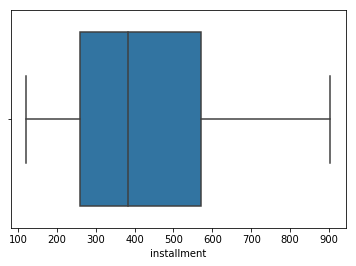

In [77]:
sns.boxplot(data3_num['installment'])

In [ ]:
data3_num.head(15)

In [ ]:
ctr2=0
for i in range(35):
    q1=data3_num[data3_num.columns[i]].quantile(0.25)
    q3=data3_num[data3_num.columns[i]].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr #acceptable range - windsorizing technique
    high=q3+1.5*iqr#acceptable range - windsorizing technique
    data3_num[data3_num.columns[i]].replace(data3_num[data3_num.columns[i]]<low,low)
    data3_num[data3_num.columns[i]].replace(data3_num[data3_num.columns[i]]>high,high)
    ctr2+=1
ctr2

In [ ]:
ctr1=0
ctr2=0
for i in range(54):
    if isinstance(data2[data2.columns[i]].iloc[1],str):
        ctr1+=1
    else:
        q1=data2[data2.columns[i]].quantile(0.25)
        q3=data2[data2.columns[i]].quantile(0.75)
        iqr=q3-q1
        low=q1-1.5*iqr #acceptable range - windsorizing technique
        high=q3+1.5*iqr#acceptable range - windsorizing technique
        data2[data2.columns[i]].replace(data2[data2.columns[i]]<low,low)
        data2[data2.columns[i]].replace(data2[data2.columns[i]]>high,high)
        ctr2+=1
    #data2_include=data2.loc[(adult_df['age']>=low)&(adult_df['age']<=high)]
#adult_df_exclude=adult_df.loc[(adult_df['age']<low)|(adult_df['age']>high)]
print(ctr1,ctr2)

In [ ]:
ctr1=0
ctr2=0
for i in range(54):
    if isinstance(data2[data2.columns[i]].iloc[1],str):
        ctr1+=1
    else:
        data2 = winsorize(data2[data2.columns[i]], limits=[0.05, 0.05])
        ctr2+=1
print(ctr1,ctr2)

In [ ]:
sns.boxplot(data2['int_rate'])

In [ ]:
q1=data2['int_rate'].quantile(0.25) #first quartile value
q3=data2['int_rate'].quantile(0.75) #third quartile value
iqr=q3-q1
low=q1-1.5*iqr #acceptable range - windsorizing technique
high=q3+1.5*iqr#acceptable range - windsorizing technique
adult_df_include=adult_df.loc[(adult_df['age']>=low)&(adult_df['age']<=high)]
adult_df_exclude=adult_df.loc[(adult_df['age']<low)|(adult_df['age']>high)]